# This notebook compares the KMP and Rabin Karp pattern matching algorithm with Brute Force Search

### Import essential libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import pickle
sb.set()

### Traverse through the file and retieve its contentns 

In [2]:
def loadall(filename):
    with open(filename, "rb") as f:
        while True:
            try:
                yield pickle.load(f)
            except EOFError:
                break

### Collect all the observations from the file

In [3]:
def load_observations(file):
        items = list(loadall(file))
        items = list(items)
        return items

### The binary file contains a list of tuples with each tuple being a data point. However, when we load the file, the list is an element of another list. Therefore to retireve its contents we index it at position 0

In [4]:
brute_force_df=pd.DataFrame(data=load_observations("brute_force_observations.pkl")[0], columns=['n', 'm', 'comparisons'])
kmp_df=pd.DataFrame(load_observations("knuth_morris_pratt_observations.pkl")[0], columns=['n', 'm', 'comparisons'])
rabin_karp_df=pd.DataFrame(load_observations("rabin_karp_observations.pkl")[0], columns=['n', 'm', 'comparisons'])

### Indicate the algorithm used

In [5]:
brute_force_df['Algo'] = 'Brute Force'
kmp_df['Algo'] = 'KMP'
rabin_karp_df['Algo'] = 'Rabin Karp'

### Concatenate the three dataframes into a single dataframe

In [6]:
df = pd.concat([brute_force_df, kmp_df, rabin_karp_df])

### Experimenting with some values
#### Not important

In [7]:
df['m*n'] = df['m'] * df['n']
df['m+n'] = df['m'] + df['n']

### Collect the observations where the length of genome_sequence is less than 40000
### The reason is because
* The Difference in Scale makes the graph uninterpretable
* Observations for larger files could not be recorded as it took a lot of time

In [8]:
small_files_observations = df[df['n'] < 40000]

### The graphs of number of comparisons was plotted with n, m + n, m * n, where
* n = Length of genome sequence
* m = Length of query

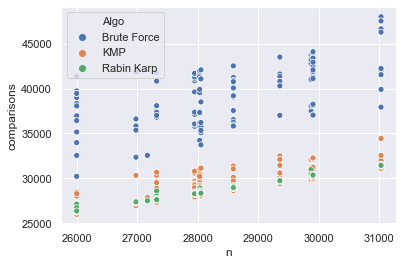

In [9]:
sb.scatterplot(data=small_files_observations, x='n', y='comparisons', hue = 'Algo')

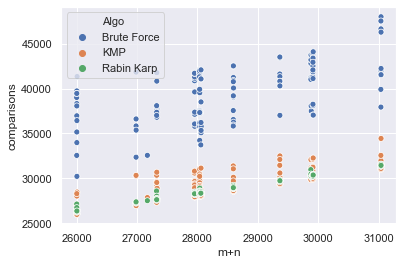

In [10]:
sb.scatterplot(data=small_files_observations, x='m+n', y='comparisons', hue = 'Algo')

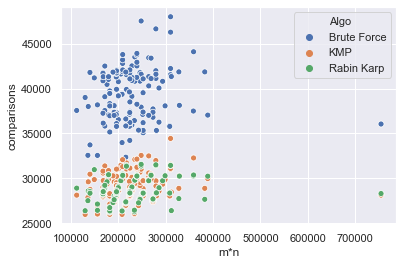

In [11]:
sb.scatterplot(data=small_files_observations, x='m*n', y='comparisons', hue = 'Algo')

### Observations and Inference
* #### The number of character comparisons done by the KMP and Rabin Karp (including hash comparisons) Algorithms were significantly less compared to the Brute Force Algorithm.
* #### From the first two graphs we can see that the number of comparisons done by the KMP and Rabin Karp Algorithms is apprimately equal to the length of the genome sequence
* #### The reason for the higher performance of these two algorithms is that whenever there is a character mismatch they do not backtrack the loop variable. 